# **1. Setup and Load data**

**1.1 Install Dependencies and setup**

In [1]:
!pip install tensorflow-gpu==2.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 39.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.1
    Uninstalling tensorboard-data-server-0.7.1:
      Successfully uninstalled tensorboard-data-server-0.7.1
  Attempti

In [2]:
!pip install tensorflow-gpu opencv-python matplotlib

In [3]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.5
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.5.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.1
arviz                            0.15.1
astropy                          5.3.2
astunparse                       1.6.3
async-timeout                    4.0.3
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0


In [4]:
import tensorflow as tf
import os

In [5]:
# Avoid OOM error by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [69]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1.2 Remove dodgy images**

In [7]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [8]:
data_dir = '/content/drive/MyDrive/facedata'

In [9]:
os.listdir(data_dir)

['sad', 'happy']

In [10]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [11]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [12]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list{}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image{}'.format(image_path))
      # os.remove(image_path)

**1.3 Load Data**

In [13]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [14]:
import numpy as np
from matplotlib import pyplot as plt

In [46]:
# It is building a data pipeline
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/facedata')

Found 284 files belonging to 2 classes.


In [16]:
# Allowing to access the data pipeline
data_iterator = data.as_numpy_iterator()

In [17]:
# Accessing the data pipeline
# get another batch from the iterator
batch = data_iterator.next()

In [18]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [22]:
# Class 1 = Sad ppl
# Class 0 = Happy ppl
batch[1]

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1], dtype=int32)

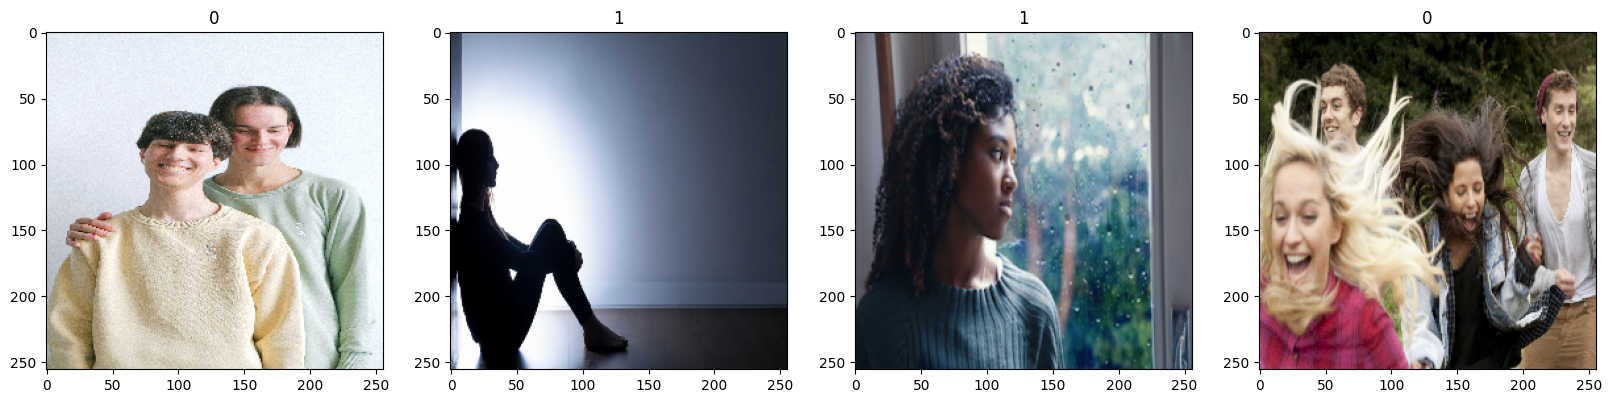

In [28]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

#**2.** **Preprocess data**

2.1 Scale data

In [47]:
#map allows us to perfrom the transformation in pipeline.
#lambda helps us to apply transformation on each image.
# x represents images and it is the independent feature and y is the label i.e. dependent feature
data = data.map(lambda x, y: (x/255, y))

In [26]:
data.as_numpy_iterator().next()

(array([[[[0.1807239 , 0.12582193, 0.3179788 ],
          [0.19548148, 0.13273638, 0.32489324],
          [0.19607843, 0.13333334, 0.3254902 ],
          ...,
          [0.49723834, 0.30900306, 0.47370893],
          [0.49728814, 0.303631  , 0.47843137],
          [0.47679707, 0.31344974, 0.46179008]],
 
         [[0.18140319, 0.12659217, 0.31870356],
          [0.18828268, 0.13338073, 0.3255376 ],
          [0.20006128, 0.13731618, 0.32947305],
          ...,
          [0.457532  , 0.29307118, 0.44999522],
          [0.46648285, 0.29997224, 0.46760255],
          [0.43393123, 0.28705624, 0.43120453]],
 
         [[0.17822123, 0.12986702, 0.31875   ],
          [0.18650669, 0.13160472, 0.32376158],
          [0.20110294, 0.13835785, 0.3305147 ],
          ...,
          [0.4197792 , 0.28529987, 0.4414795 ],
          [0.38136777, 0.2615148 , 0.4130467 ],
          [0.38697487, 0.25848222, 0.4032169 ]],
 
         ...,
 
         [[0.03036152, 0.02643995, 0.0578125 ],
          [0.03137

In [29]:
scaled_iterator = data.as_numpy_iterator()

In [30]:
batch = scaled_iterator.next()

In [34]:
batch[0].min()

0.0

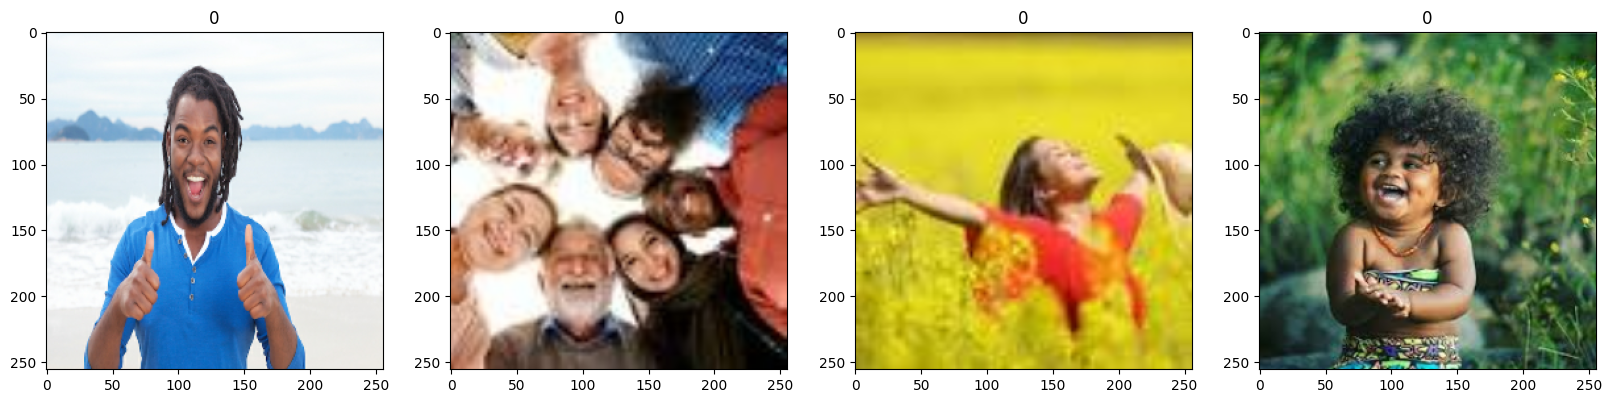

In [31]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

2.2 Split data

In [35]:
len(data)

9

In [40]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [44]:
train_size+val_size+test_size

9

In [45]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(train_size)

#**3. Deep Model**

**3.1 Build Deep Learning Model**

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [50]:
model = Sequential()

In [51]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [53]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

**3.2 Train**

In [55]:
logdir='logs'

In [56]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [57]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
6/6 [==============================] - 20s 2s/step - loss: 0.9067 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.5469
Epoch 2/20
6/6 [==============================] - 16s 2s/step - loss: 0.5990 - accuracy: 0.6823 - val_loss: 0.6721 - val_accuracy: 0.6250
Epoch 3/20
6/6 [==============================] - 16s 2s/step - loss: 0.6511 - accuracy: 0.6094 - val_loss: 0.5849 - val_accuracy: 0.8438
Epoch 4/20
6/6 [==============================] - 19s 3s/step - loss: 0.6009 - accuracy: 0.7604 - val_loss: 0.4957 - val_accuracy: 0.6562
Epoch 5/20
6/6 [==============================] - 18s 3s/step - loss: 0.5599 - accuracy: 0.7135 - val_loss: 0.4301 - val_accuracy: 0.8281
Epoch 6/20
6/6 [==============================] - 17s 2s/step - loss: 0.4557 - accuracy: 0.8229 - val_loss: 0.3769 - val_accuracy: 0.8281
Epoch 7/20
6/6 [==============================] - 21s 3s/step - loss: 0.3587 - accuracy: 0.8646 - val_loss: 0.3064 - val_accuracy: 0.8438
Epoch 8/20
6/6 [==================

**3.3 Plot Performance**

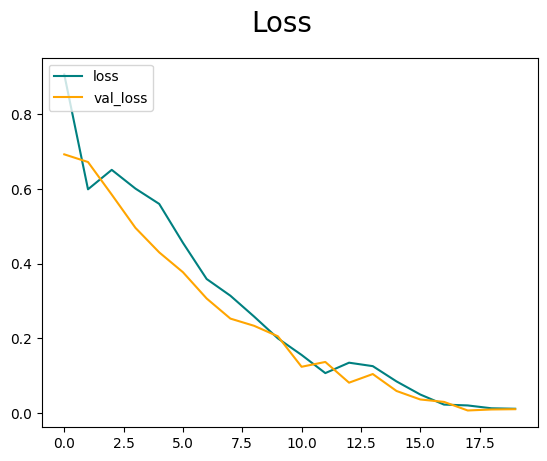

In [59]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

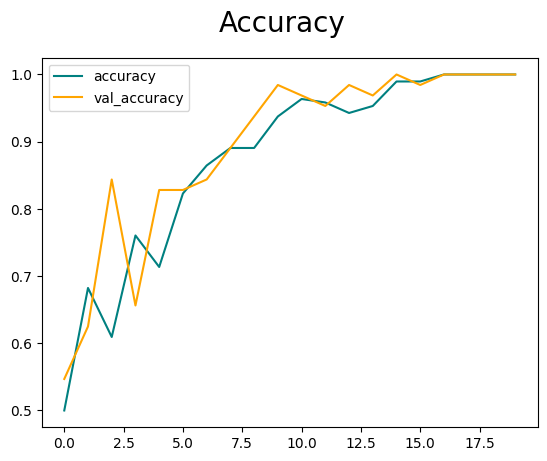

In [60]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

# **4. Evaluate Performance**

**4.1 Evaluate**

In [61]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [62]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [63]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 0s 420ms/step


In [65]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


**4.2 Test**

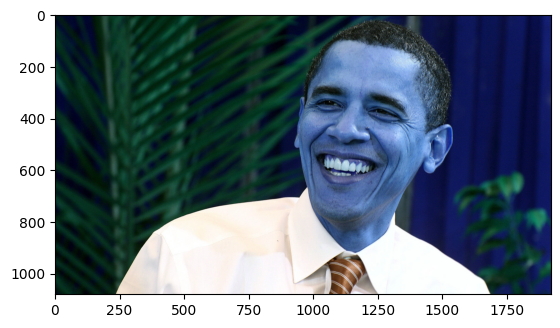

In [71]:
img = cv2.imread('/content/drive/MyDrive/facedata/happytest.jpg')
plt.imshow(img)
plt.show()

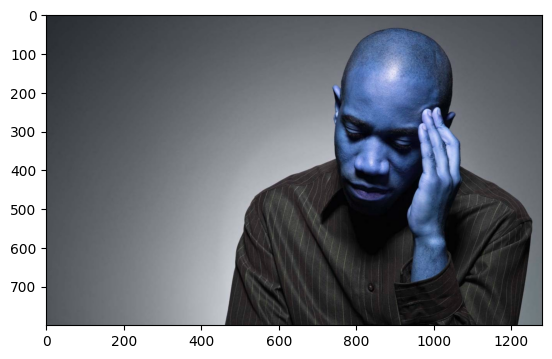

In [72]:
img = cv2.imread('/content/drive/MyDrive/facedata/sadtest.jpg')
plt.imshow(img)
plt.show()

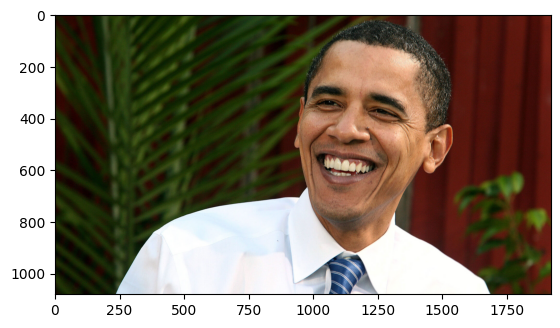

In [81]:
img = cv2.imread('/content/drive/MyDrive/facedata/happytest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

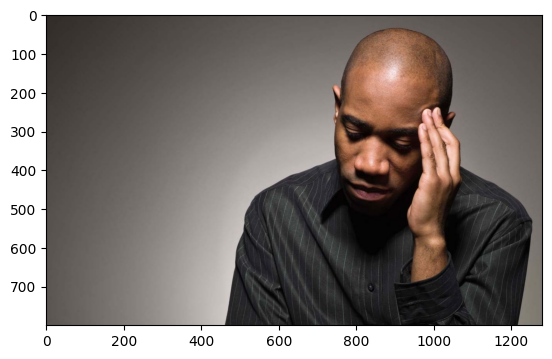

In [87]:
img = cv2.imread('/content/drive/MyDrive/facedata/sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

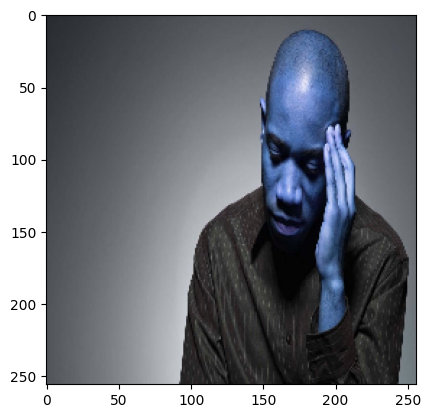

In [92]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [88]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [94]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 48ms/step


In [95]:
yhat

array([[0.6794979]], dtype=float32)

In [96]:
if yhat > 0.5:
  print(f'Predicted class is sad')
else:
  print(f'Predicted class is happy')

Predicted class is sad


# **Save the Model**

**5.1 Save the model**

In [97]:
from tensorflow.keras.models import load_model

In [98]:
model.save(os.path.join('models','happysadmodel.h5'))

In [99]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [100]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 103ms/step


array([[0.6794979]], dtype=float32)

In [101]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 40ms/step


In [102]:
if yhatnew > 0.5:
  print(f'Predicted class is sad')
else:
  print(f'Predicted class is happy')

Predicted class is sad
